<a href="https://colab.research.google.com/github/chaitanya402/Datascience/blob/main/VQA_project_CNN_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install numpy
# # !pip install
# !pip install matplotlib
# !pip install scikit-learn
# !pip install tensorflow

In [ ]:
# !pip install opencv-python

  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)


In [ ]:
# !pip install torch

In [ ]:
# !pip install transformers

  Using cached transformers-4.46.1-py3-none-any.whl.metadata (44 kB)
  Using cached huggingface_hub-0.26.2-py3-none-any.whl.metadata (13 kB)
Using cached transformers-4.46.1-py3-none-any.whl (10.0 MB)
Using cached huggingface_hub-0.26.2-py3-none-any.whl (447 kB)
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ---------------------------------------- 2.4/2.4 MB 15.1 MB/s eta 0:00:00


In [ ]:
# !pip install torchvision

  Using cached sympy-1.13.1-py3-none-any.whl.metadata (12 kB)
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 1.6/1.6 MB 20.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/203.0 MB ? eta -:--:--
   - -------------------------------------- 7.3/203.0 MB 34.9 MB/s eta 0:00:06
   -- ------------------------------------- 11.8/203.0 MB 29.5 MB/s eta 0:00:07
   --- ------------------------------------ 17.3/203.0 MB 28.7 MB/s eta 0:00:07
   ---- ----------------------------------- 23.6/203.0 MB 27.6 MB/s eta 0:00:07
   ------ --------------------------------- 31.7/203.0 MB 30.0 MB/s eta 0:00:06
   ------- -------------------------------- 35.7/203.0 MB 28.0 MB/s eta 0:00:06
   -------- ------------------------------- 41.7/203.0 MB 27.9 MB/s eta 0:00:06
   --------- ------------------------------ 48.8/203.0 MB 28.7 MB/s eta 0:00:06
   ---------- ----------------------------- 55.1/203.0 MB 28.7 MB/s eta 0:00:06
  

In [ ]:
# !pip install tensorflow

  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.6.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
    --------------------------------------- 7.6/390.3 MB 39.3 MB/s eta 0:00:10
   - ---------------

In [ ]:
# !pip install data

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for data: filename=data-0.4-py3-none-any.whl size=7259 sha256=bcb866029188e3c46cce5ee1981ef1cf2d7954fe5d0a5f8fd62e1e59c20b493b
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\0e\90\87\0e55006f5c69af278687927041e334cfb928ab0a7ad9b0c1a3
Successfully built data


In [ ]:
!pip install pydot

In [ ]:
import os
import cv2
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.svm import SVC
# from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
# from sklearn.decomposition import PCA

In [ ]:
# from sklearn.model_selection import train_test_split

In [ ]:

train_directory = "input/chest-xray-pneumonia/chest_xray/train"
train_directory = "C:/Users/ASUS/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/train"
labels = ['NORMAL', 'PNEUMONIA']
print(os.listdir(train_directory))

['NORMAL', 'PNEUMONIA']


In [ ]:
train_normal_dir = os.path.join(train_directory, "NORMAL")
train_pneumonia_dir = os.path.join(train_directory, "PNEUMONIA")
print("No. of PNEUMONIA images:", len(os.listdir(train_pneumonia_dir)))
print("No. of NORMAL images:", len(os.listdir(train_normal_dir)))

No. of PNEUMONIA images: 3875
No. of NORMAL images: 1341


In [ ]:
sample_normal_image = os.listdir(train_normal_dir)[0]
sample_pneumonia_image = os.listdir(train_pneumonia_dir)[0]

Normal example:


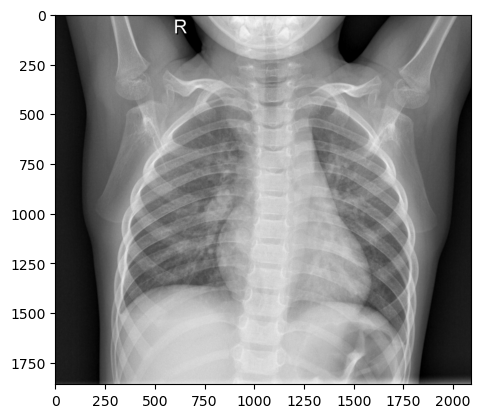

In [ ]:
normal_image_path = os.path.join(train_normal_dir, sample_normal_image)
img = cv2.imread(normal_image_path)
print("Normal example:")
plt.imshow(img)

Pneumonia example:


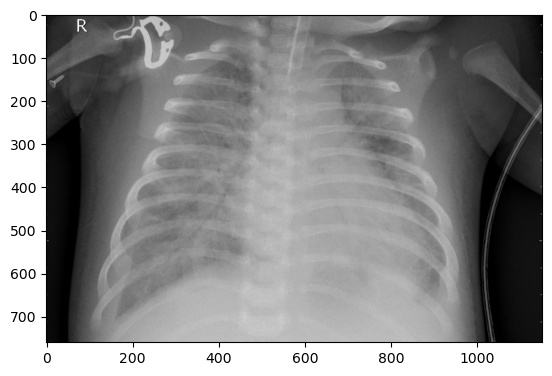

In [ ]:
pneumonia_image_path = os.path.join(train_pneumonia_dir, sample_pneumonia_image)
img = cv2.imread(pneumonia_image_path)
print("Pneumonia example:")
plt.imshow(img)

In [ ]:
img.shape

(760, 1152, 3)

In [ ]:
pneumonial_data = []
pneumonial_target = []
for label in labels:
    path = os.path.join(train_directory, label)
    for img_name in os.listdir(path):
        image = cv2.imread(os.path.join(path, img_name))
        if image is not None:
            resized_image = cv2.resize(image, (128, 128))
            pneumonial_data.append(resized_image)
            pneumonial_target.append(labels.index(label))

In [ ]:
labels

['NORMAL', 'PNEUMONIA']

In [ ]:
#### processing slake data , and merging the slake data to use for model training and testing
import data
from datasets import load_dataset
train_dataset = load_dataset("BoKelvin/SLAKE" , split="train")


In [ ]:
#### processing slake data , and merging the slake data to use for model training and testing

slake_data_path = "C:/Users/ASUS/Downloads/imgs/imgs/"


Pneumonia_data = train_dataset.filter(lambda x: x['answer'].lower() == 'pneumonia' )
Normal_data = train_dataset.filter(lambda x: x['img_name'] not in Pneumonia_data["img_name"] )


In [ ]:
Pnuemonia_image_path = []
for image_path in Pneumonia_data['img_name']:
    slake_image_path = slake_data_path + image_path
    Pnuemonia_image_path.append(slake_image_path)

Other_image_path = []
for image_path in Normal_data['img_name']:
    slake_image_path = slake_data_path + image_path
    Other_image_path.append(slake_image_path)

Pnuemonia_image_path,Other_image_path

(['C:/Users/ASUS/Downloads/imgs/imgs/xmlab133/source.jpg',
  'C:/Users/ASUS/Downloads/imgs/imgs/xmlab146/source.jpg',
  'C:/Users/ASUS/Downloads/imgs/imgs/xmlab149/source.jpg',
  'C:/Users/ASUS/Downloads/imgs/imgs/xmlab157/source.jpg',
  'C:/Users/ASUS/Downloads/imgs/imgs/xmlab305/source.jpg',
  'C:/Users/ASUS/Downloads/imgs/imgs/xmlab345/source.jpg',
  'C:/Users/ASUS/Downloads/imgs/imgs/xmlab358/source.jpg',
  'C:/Users/ASUS/Downloads/imgs/imgs/xmlab364/source.jpg',
  'C:/Users/ASUS/Downloads/imgs/imgs/xmlab373/source.jpg',
  'C:/Users/ASUS/Downloads/imgs/imgs/xmlab376/source.jpg',
  'C:/Users/ASUS/Downloads/imgs/imgs/xmlab382/source.jpg'],
 ['C:/Users/ASUS/Downloads/imgs/imgs/xmlab1/source.jpg',
  'C:/Users/ASUS/Downloads/imgs/imgs/xmlab1/source.jpg',
  'C:/Users/ASUS/Downloads/imgs/imgs/xmlab1/source.jpg',
  'C:/Users/ASUS/Downloads/imgs/imgs/xmlab1/source.jpg',
  'C:/Users/ASUS/Downloads/imgs/imgs/xmlab1/source.jpg',
  'C:/Users/ASUS/Downloads/imgs/imgs/xmlab1/source.jpg',
  'C:/Us

In [ ]:
# ['NORMAL', 'PNEUMONIA']

slake_data = []
slake_target = []

for label in labels:
    if label == "PNEUMONIA":
        for img_path in Pnuemonia_image_path:
            image = cv2.imread(img_path)
            if image is not None:
                resized_image = cv2.resize(image, (128, 128))
                slake_data.append(resized_image)
                slake_target.append(labels.index(label))
    else:
        for img_path in Other_image_path:
            image = cv2.imread(os.path.join(path, img_name))
            if image is not None:
                resized_image = cv2.resize(image, (128, 128))
                slake_data.append(resized_image)
                slake_target.append(labels.index(label))

In [ ]:
type(pneumonial_data),type(pneumonial_target),type(slake_data),type(slake_target)

(list, list, list, list)

In [ ]:
pneumonial_data = pneumonial_data + slake_data

In [ ]:
pneumonial_target = pneumonial_target + slake_target

In [ ]:
pneumonial_data = np.array(pneumonial_data)
pneumonial_target = np.array(pneumonial_target)
type(pneumonial_target), type(pneumonial_data)

(numpy.ndarray, numpy.ndarray)

In [ ]:
pneumonial_data.shape, pneumonial_target.shape

((14824, 128, 128, 3), (14824,))

In [ ]:
pneumonial_data_flattened = pneumonial_data.reshape(pneumonial_data.shape[0], -1)

In [ ]:
pneumonial_data_flattened.shape

(14824, 49152)

In [ ]:
import tensorflow as tf



In [ ]:
# import keras
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential

In [ ]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

model_NN = Sequential([
    Conv2D(64, (3, 3), activation="relu", input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
])
model_NN.summary()

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)              │ (None, 126, 126, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,720 (151.25 KB)

 Trainable params: 38,720 (151.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_NN.add(Flatten())
model_NN.add(Dense(256, activation="relu"))
model_NN.add(Dense(128, activation="relu"))
model_NN.add(Dense(128, activation="relu"))
model_NN.add(Dense(64, activation="relu"))
model_NN.add(Dense(64, activation="relu"))
model_NN.add(Dense(32, activation="relu"))
model_NN.add(Dense(16, activation="relu"))
model_NN.add(Dense(1, activation="sigmoid"))

model_NN.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)              │ (None, 126, 126, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 256)            │    14,745,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,849,025 (56.64 MB)

 Trainable params: 14,849,025 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_NN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(pneumonial_data, pneumonial_target, test_size=0.3, random_state=42)

In [ ]:
model_NN.fit(X_train_nn, y_train_nn, epochs=12, batch_size=4,validation_data=(X_test_nn, y_test_nn))

Epoch 1/5
2594/2594 ━━━━━━━━━━━━━━━━━━━━ 431s 165ms/step - accuracy: 0.9004 - loss: 0.4904
Epoch 2/5
2594/2594 ━━━━━━━━━━━━━━━━━━━━ 413s 159ms/step - accuracy: 0.9448 - loss: 0.1616
Epoch 3/5
2594/2594 ━━━━━━━━━━━━━━━━━━━━ 410s 158ms/step - accuracy: 0.9472 - loss: 0.1894
Epoch 4/5
2594/2594 ━━━━━━━━━━━━━━━━━━━━ 410s 158ms/step - accuracy: 0.9579 - loss: 0.1175
Epoch 5/5
2594/2594 ━━━━━━━━━━━━━━━━━━━━ 410s 158ms/step - accuracy: 0.9646 - loss: 0.1023


In [ ]:
history = model_NN.fit(X_train_nn, y_train_nn, epochs=5, batch_size=4,validation_data=(X_test_nn, y_test_nn))


Epoch 1/5
2594/2594 ━━━━━━━━━━━━━━━━━━━━ 392s 150ms/step - accuracy: 0.8854 - loss: 0.9788 - val_accuracy: 0.9436 - val_loss: 0.1313
Epoch 2/5
2594/2594 ━━━━━━━━━━━━━━━━━━━━ 391s 151ms/step - accuracy: 0.9441 - loss: 0.1409 - val_accuracy: 0.9406 - val_loss: 0.1628
Epoch 3/5
2594/2594 ━━━━━━━━━━━━━━━━━━━━ 395s 152ms/step - accuracy: 0.9474 - loss: 0.1341 - val_accuracy: 0.9503 - val_loss: 0.1535
Epoch 4/5
2594/2594 ━━━━━━━━━━━━━━━━━━━━ 390s 150ms/step - accuracy: 0.9544 - loss: 0.1136 - val_accuracy: 0.9582 - val_loss: 0.1359
Epoch 5/5
2594/2594 ━━━━━━━━━━━━━━━━━━━━ 392s 151ms/step - accuracy: 0.9599 - loss: 0.1080 - val_accuracy: 0.9611 - val_loss: 0.1591


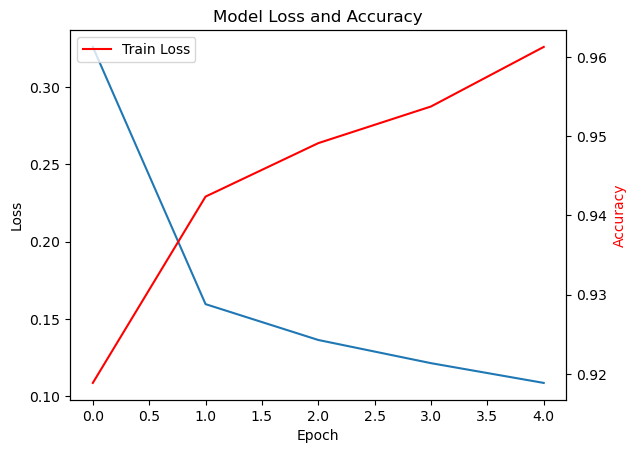

In [ ]:
import matplotlib.pyplot as plt

# Plot Loss
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])  # Uncomment if you have validation data
plt.title('Model Loss and Accuracy')  # Updated title
plt.ylabel('Loss')
plt.xlabel('Epoch')

# Plot Accuracy on a secondary y-axis
plt.twinx()  # Create a secondary y-axis
plt.plot(history.history['accuracy'], color='red')  # Plot accuracy in red
# plt.plot(history.history['val_accuracy'], color='orange')  # Uncomment if you have validation data
plt.ylabel('Accuracy', color='red')  # Label the secondary y-axis

plt.legend(['Train Loss', 'Validation Loss', 'Train Accuracy', 'Validation Accuracy'], loc='upper left')  # Adjust legend as needed
plt.show()


In [ ]:
from sklearn.metrics import precision_recall_curve, f1_score

# ... (Your existing code for model training and prediction) ...

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test_nn, y_pred_nn)

# Calculate F1-score for each threshold
f1_scores = (2 * precision * recall) / (precision + recall)

# Find the threshold with the maximum F1-score
optimal_threshold = thresholds[np.argmax(f1_scores)]

print(f"Optimal Threshold: {optimal_threshold}")

# Update y_pred_binary with the optimal threshold
y_pred_binary = (y_pred_nn > optimal_threshold).astype(int)


Optimal Threshold: 0.6860613822937012


In [ ]:
### getting scores for our model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming you have already trained your model (model_NN) and have X_test_nn and y_test_nn

# 1. Make predictions on the test set
y_pred_nn = model_NN.predict(X_test_nn)


# 3. Calculate various scores
accuracy = accuracy_score(y_test_nn, y_pred_binary)
precision = precision_score(y_test_nn, y_pred_binary)
recall = recall_score(y_test_nn, y_pred_binary)
f1 = f1_score(y_test_nn, y_pred_binary)
roc_auc = roc_auc_score(y_test_nn, y_pred_nn)  # Use probabilities for ROC AUC

# 4. Print the scores
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC:", roc_auc)

NameError: name 'model_NN' is not defined

In [ ]:
from PIL import Image
val_image_path = 'C:/Users/ASUS/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg'
# image = Image.open(val_image_path)
resized_image = []
predict_data = []
image = cv2.imread(val_image_path)
if image is not None:
            resize = cv2.resize(image, (128, 128))
            resized_image.append(resize)
resized_image = np.array(resized_image)
print(resized_image.shape)
print(model_NN.predict(resized_image))

(1, 128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
[[1.]]


In [ ]:
model_NN.save('model_NN.h5')

In [ ]:
from tensorflow.keras.models import load_model

pneumonia_model = load_model('model_NN.h5')

In [ ]:
pneumonia_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 126, 126, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 256)            │    14,745,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,849,027 (56.64 MB)

 Trainable params: 14,849,025 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
from tensorflow.keras.models import Model

In [ ]:
import torch
import torch.nn as nn
from transformers import BertModel, BertTokenizer
from PIL import Image
from torchvision import transforms
import torchvision.models as models

In [ ]:
val_image_path = 'C:/Users/ASUS/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg'

# "C:/Users/ASUS/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/train"

In [ ]:
from transformers import ViTFeatureExtractor, ViTModel
from PIL import Image
import torch

feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224-in21k')
vit_model = ViTModel.from_pretrained('google/vit-base-patch16-224-in21k')

image = Image.open(val_image_path)

if image.mode != "RGB":
    image = image.convert("RGB")

inputs = feature_extractor(images=image, return_tensors="pt")
vit_features = vit_model(**inputs).last_hidden_state


C:\Users\ASUS\anaconda3\Lib\site-packages\transformers\models\vit\feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [ ]:
from transformers import BertTokenizer, BertModel

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

question_input = "Does this patient have pneumonia?"
question_tokens = tokenizer(question_input, return_tensors="pt", padding=True, truncation=True)
question_features = bert_model(**question_tokens).last_hidden_state

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
import cv2
import numpy as np

# Assuming pneumonia_model is already loaded

# Add an input layer
input_tensor = tf.keras.Input(shape=(128, 128, 3))  # Adjust the shape accordingly

# Add a dummy Conv2D layer to match the expected channels
x = tf.keras.layers.Conv2D(3, (1, 1), padding='same')(input_tensor)

# Create the intermediate layer model, using input_tensor
intermediate_layer_model = Model(inputs=input_tensor,
                                 outputs=pneumonia_model.get_layer('conv2d_13')(x))


###extracting features from the CNN model we created
from PIL import Image
val_image_path = 'C:/Users/ASUS/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg'
# image = Image.open(val_image_path)
resized_image = []
predict_data = []
image = cv2.imread(val_image_path)
if image is not None:
            resize = cv2.resize(image, (128, 128))
            resized_image.append(resize)
resized_image = np.array(resized_image)
print(resized_image.shape)
# print(model_NN.predict(resized_image))

pneumonia_features = intermediate_layer_model.predict(resized_image)
print(pneumonia_features)


(1, 128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
[[[[-0.         -0.         -0.         ... -0.         -0.
    -0.        ]
   [-0.         -0.         -0.         ... -0.         -0.
    -0.        ]
   [-0.         -0.         -0.         ... -0.         -0.
    -0.        ]
   ...
   [-0.         -0.         -0.         ... -0.         -0.
    -0.        ]
   [-0.         -0.         -0.         ... -0.         -0.
    -0.        ]
   [-0.         -0.         -0.         ... -0.         -0.
    -0.        ]]

  [[-0.         -0.         -0.         ... -0.         -0.
    -0.        ]
   [-0.         -0.         -0.         ... -0.         -0.
    -0.        ]
   [-0.         -0.         -0.         ... -0.         -0.
    -0.        ]
   ...
   [-0.         -0.         -0.         ... -0.         -0.
    -0.        ]
   [-0.         -0.         -0.         ... -0.         -0.
    -0.        ]
   [-0.         -0.         -0.         ... -0.         -0.
    -0.        ]]

  [

In [ ]:
import torch.nn as nn
import torch

# ... (Your previous code to extract pneumonia_features) ...

# Reshape features for concatenation
vit_features_flat = vit_features.view(vit_features.size(0), -1)
question_features_flat = question_features.view(question_features.size(0), -1)

# Assuming pneumonia_features is a NumPy array, convert to PyTorch tensor
pneumonia_features_tensor = torch.from_numpy(pneumonia_features.reshape(pneumonia_features.shape[0], -1)).type(torch.float32)
# Ensure data type matches other features (e.g., float32)

# Concatenate features
combined_features = torch.cat((vit_features_flat, question_features_flat, pneumonia_features_tensor), dim=1)


In [ ]:
combined_features

tensor([[ 0.0675,  0.0426, -0.1701,  ..., -0.0000, -0.0000, -0.0000]],
       grad_fn=<CatBackward0>)

In [ ]:
fc1 = nn.Linear(combined_features.size(1), 128)
fc2 = nn.Linear(128, 2)

x = fc1(combined_features)
x = torch.relu(x)
output = fc2(x)

_, predicted_class = torch.max(output, dim=1)
answer = "Pneumonia" if predicted_class.item() == 1 else "Normal"
print("VQA Output:", answer)

VQA Output: Pneumonia


In [ ]:
from sklearn.metrics import precision_recall_curve, f1_score

# ... (Your existing code for model training and prediction) ...

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test_nn, y_pred_nn)

# Calculate F1-score for each threshold
f1_scores = (2 * precision * recall) / (precision + recall)

# Find the threshold with the maximum F1-score
optimal_threshold = thresholds[np.argmax(f1_scores)]

print(f"Optimal Threshold: {optimal_threshold}")

# Update y_pred_binary with the optimal threshold
y_pred_binary = (y_pred_nn > optimal_threshold).astype(int)


Optimal Threshold: 0.268069326877594


In [ ]:
history.history

{'accuracy': [0.9696415066719055,
  0.9716653823852539,
  0.9714726209640503,
  0.9800500869750977,
  0.9702197313308716],
 'loss': [0.12051515281200409,
  0.17203614115715027,
  0.09219667315483093,
  0.06436812877655029,
  0.17284300923347473]}

In [ ]:
history = model_NN.fit(X_train_nn, y_train_nn, epochs=5, batch_size=4, validation_data=(X_test_nn, y_test_nn))


Epoch 1/5
2594/2594 ━━━━━━━━━━━━━━━━━━━━ 438s 169ms/step - accuracy: 0.9826 - loss: 0.0592 - val_accuracy: 0.9631 - val_loss: 0.2150
Epoch 2/5
2594/2594 ━━━━━━━━━━━━━━━━━━━━ 429s 165ms/step - accuracy: 0.9806 - loss: 0.0836 - val_accuracy: 0.9658 - val_loss: 0.1053
Epoch 3/5
2594/2594 ━━━━━━━━━━━━━━━━━━━━ 430s 166ms/step - accuracy: 0.9818 - loss: 0.0621 - val_accuracy: 0.9755 - val_loss: 0.1126
Epoch 4/5
2594/2594 ━━━━━━━━━━━━━━━━━━━━ 430s 166ms/step - accuracy: 0.9243 - loss: 0.1911 - val_accuracy: 0.7311 - val_loss: 0.5822
Epoch 5/5
2594/2594 ━━━━━━━━━━━━━━━━━━━━ 432s 166ms/step - accuracy: 0.7335 - loss: 0.5831 - val_accuracy: 0.7311 - val_loss: 0.5821


In [ ]:
import pandas as pd

# Create a DataFrame from the history
df = pd.DataFrame(history.history)

# Add the epoch column
df['epoch'] = df.index + 1

# Select and reorder columns
df = df[['epoch', 'accuracy', 'val_accuracy', 'loss', 'val_loss']]

# Display the table
display(df)

,epoch,accuracy,val_accuracy,loss,val_loss
0,1,0.918851,0.943570,0.325985,0.131299
1,2,0.942367,0.940647,0.159582,0.162844
2,3,0.949113,0.950315,0.136396,0.153460
3,4,0.953739,0.958183,0.121393,0.135944
4,5,0.961257,0.961106,0.108615,0.159134


139/139 ━━━━━━━━━━━━━━━━━━━━ 11s 78ms/step
[[3151  101]
 [  72 1124]]


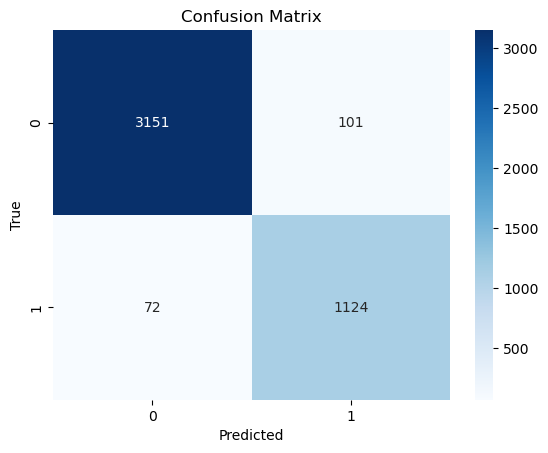

In [ ]:
from sklearn.metrics import confusion_matrix

# 1. Make predictions on the test set
y_pred_nn = model_NN.predict(X_test_nn)

# 2. Convert predictions to binary (0 or 1)
y_pred_binary = (y_pred_nn > 0.5).astype(int)  # Adjust threshold if needed

# 3. Calculate the confusion matrix
cm = confusion_matrix(y_test_nn, y_pred_binary)

# 4. Print the confusion matrix
print(cm)


import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# Assuming you have already trained your model (model_NN) and have X_test_nn and y_test_nn

# 1. Make predictions on the test set
y_pred_nn = model_NN.predict(X_test_nn)

# 2. Convert predictions to binary (0 or 1)
y_pred_binary = (y_pred_nn > 0.5).astype(int)  # Adjust threshold if needed

# 3. Calculate the confusion matrix
cm = confusion_matrix(y_test_nn, y_pred_binary)

# 4. Create a Pandas DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=['Actual Normal', 'Actual Pneumonia'],
                     columns=['Predicted Normal', 'Predicted Pneumonia'])

# 5. Display the table
display(cm_df)

NameError: name 'model_NN' is not defined